In [66]:
# Libaries
import pandas as pd


#### Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [67]:
# Importing DFs from Part 1 and 2
ReddingBikesDF = pd.read_csv('../data/ReddingBikesDF.csv')
fsVenuesDF = pd.read_csv('../data/FoursquareVenuesDF.csv')
yelpVenuesDF = pd.read_csv('../data/yelpVenuesDF.csv')

In [68]:
# Merging the Bike Stations df to the foursquare
fsCombinedDF = pd.merge(fsVenuesDF, ReddingBikesDF, left_on='stationIndex', right_index=True)
yelpCombinedDF = pd.merge(yelpVenuesDF, ReddingBikesDF, left_on='stationIndex', right_index=True)

In [69]:
# Aggregating relevant numeric data to group by stations
agg_dict = {'empty_slots':'mean', 'free_bikes':'mean','total_slots':'mean', # Station Columns
            'fsqID':'count','distance':'mean','rating':'mean','totalRatings':'mean','popularity':'mean', 'price':'mean'} # fs venues columns
fsStationsNumDF = fsCombinedDF.groupby('stationIndex').agg(agg_dict)

agg_dict = {'empty_slots':'mean', 'free_bikes':'mean','total_slots':'mean', # Station Columns
            'totalVenues':'mean','distance':'mean','rating':'mean','reviewCount':'mean', 'price':'mean'} # yelp venues columns
yelpStationsNumDF = yelpCombinedDF.groupby('stationIndex').agg(agg_dict)

In [70]:
fsStationsNumDF.head()

,empty_slots,free_bikes,total_slots,fsqID,distance,rating,totalRatings,popularity,price
stationIndex,,,,,,,,,
0,2.0,2.0,4.0,29,560.379310,7.580,19.000000,0.892523,1.600000
1,3.0,2.0,5.0,33,447.909091,7.300,15.357143,0.872164,1.520000
2,2.0,3.0,5.0,33,441.848485,7.300,15.357143,0.872164,1.520000
3,3.0,0.0,3.0,11,730.181818,6.475,5.750000,0.829809,1.000000
4,3.0,3.0,6.0,28,599.857143,7.350,11.000000,0.820648,1.285714


In [71]:
yelpStationsNumDF.head()

,empty_slots,free_bikes,total_slots,totalVenues,distance,rating,reviewCount,price
stationIndex,,,,,,,,
0,2.0,2.0,4.0,48.920635,511.392761,3.944444,147.365079,1.863636
1,3.0,2.0,5.0,49.507937,356.488996,3.890476,151.920635,1.863636
2,2.0,3.0,5.0,49.507937,359.492180,3.890476,151.920635,1.863636
3,3.0,0.0,3.0,21.000000,937.247393,3.590000,88.400000,1.000000
4,3.0,3.0,6.0,31.272727,636.321484,3.963636,105.772727,1.714286


In [87]:
# fsStationsNumDF.to_csv('../data/fsStationsNumDF.csv', sep=',',index=False)
# yelpStationsNumDF.to_csv('../data/yelpStationsNumDF.csv', sep=',',index=False)

#### Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discovered through this visualization. 

In [72]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
fsStationsNumDF.describe()

,empty_slots,free_bikes,total_slots,fsqID,distance,rating,totalRatings,popularity,price
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2.818182,1.863636,4.681818,29.772727,563.032804,7.356877,15.710015,0.868869,1.533203
std,1.531770,0.940894,1.323285,5.681481,98.530271,0.252014,3.094022,0.021375,0.175053
min,1.000000,0.000000,3.000000,11.000000,438.727273,6.475000,5.750000,0.820648,1.000000
25%,2.000000,2.000000,4.000000,28.250000,488.327652,7.300000,15.089286,0.869908,1.500000
50%,2.000000,2.000000,4.000000,31.500000,569.748479,7.328205,15.370879,0.872164,1.520000
75%,3.000000,2.000000,5.000000,33.000000,628.130952,7.483333,17.187500,0.883043,1.590625
max,7.000000,3.000000,8.000000,36.000000,747.720000,7.860000,21.666667,0.898974,2.000000


In [74]:
yelpStationsNumDF.describe()

,empty_slots,free_bikes,total_slots,totalVenues,distance,rating,reviewCount,price
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2.818182,1.863636,4.681818,43.727431,524.932713,3.912274,152.213181,1.818080
std,1.531770,0.940894,1.323285,11.349468,157.898313,0.122008,40.103234,0.192272
min,1.000000,0.000000,3.000000,7.571429,351.535338,3.590000,88.400000,1.000000
25%,2.000000,2.000000,4.000000,43.954545,387.030135,3.859562,143.944044,1.837209
50%,2.000000,2.000000,4.000000,49.132286,502.681572,3.890476,149.725694,1.860390
75%,3.000000,2.000000,5.000000,49.507937,630.752912,3.955848,152.051587,1.878700
max,7.000000,3.000000,8.000000,51.709677,937.247393,4.271429,314.142857,2.041667


In [75]:
def corrHeatmap(data):
    """ 
    Shows correlation heatmap for calumns in a dataframe
    Args:
        data (dataframe): numerical dataframe of data
    Returns:
        Correlation heatmap plot
    """
    sns.heatmap(
    data.corr(),
    annot=True,
    mask=np.triu(np.ones_like(data.corr(), dtype=bool))
    )


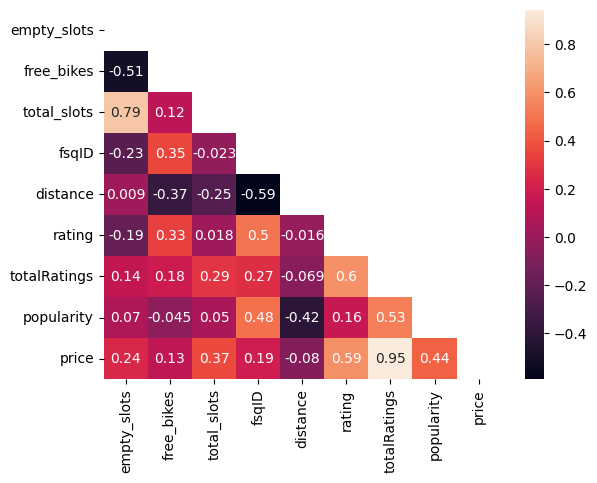

In [33]:
corrHeatmap(fsStationsNumDF)


**Foursquare Data**

Looking at correlation from the total slots, we can see that there is a small correlation to the number of points of interest (fsqID) and the popularity. We would expect to see the opposite, as there should be use of bikes in more popular areas but we can see that there is more correlation from the total bikes to the number of ratings (total ratings) and the price.


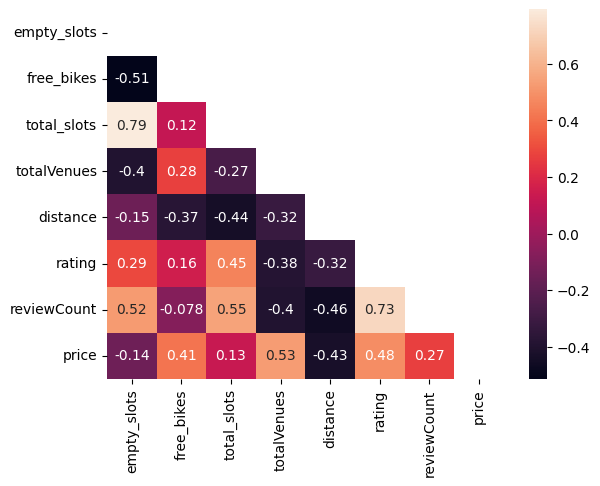

In [76]:
corrHeatmap(yelpStationsNumDF)


**Yelp Data**

Though it is higher, there is still an unexpected negative and small correlation between the total bike slots at a station and the number of venues in that stations area. However, there is a higher correlation between the review counts and total bikes at a station, which aligns with the hypothesis that there should be more bikes where there is more traffic. There is also a larger correlation with the rating and price of locations nearby bike stations with more bikes

Overall, we don't see much correlation between the number of bike slots at each station and the number of relevant locations nearby. 

However, we do see a higher correlation between the number of reviews and the number of bikes at a station, which suggests that there are bikes slots at locations with more people and traffic, instead of the original hypothesis that there will be bike slots given more nearby venues. 


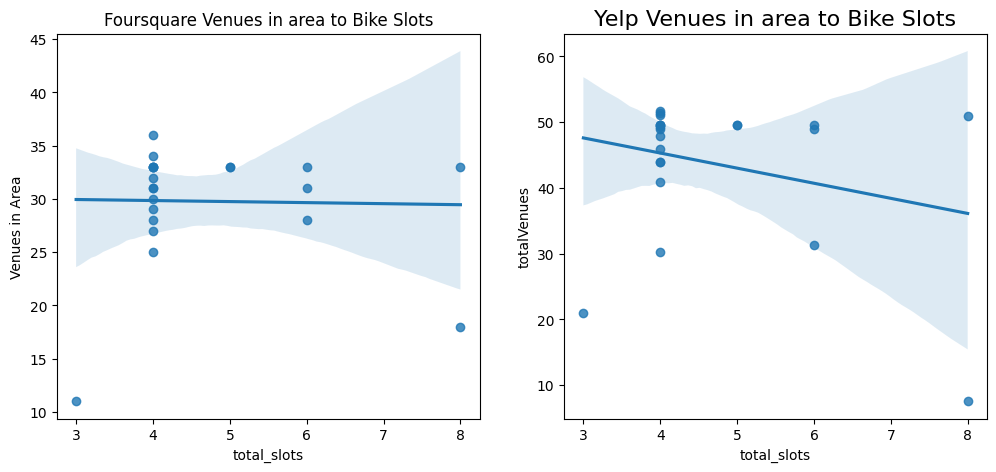

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(data=fsStationsNumDF, x='total_slots', y='fsqID', ax=ax[0])
ax[0].set(title='Foursquare Venues in area to Bike Slots',
          ylabel='Venues in Area')


sns.regplot(data=yelpStationsNumDF, x='total_slots', y='totalVenues', ax=ax[1])
ax[1].set_title('Yelp Venues in area to Bike Slots', fontsize=16)

plt.show()

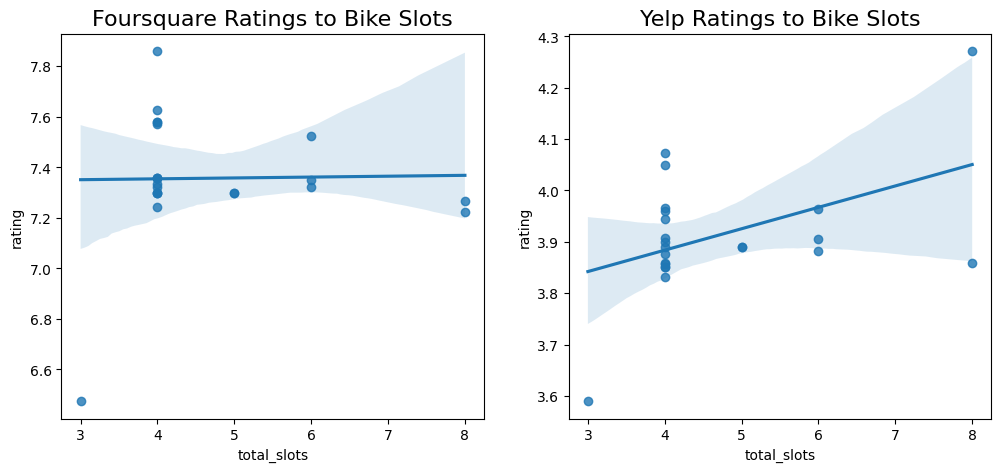

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(data=fsStationsNumDF, x='total_slots', y='rating', ax=ax[0])
ax[0].set_title('Foursquare Ratings to Bike Slots', fontsize=16)

sns.regplot(data=yelpStationsNumDF, x='total_slots', y='rating', ax=ax[1])
ax[1].set_title('Yelp Ratings to Bike Slots', fontsize=16)

plt.show()

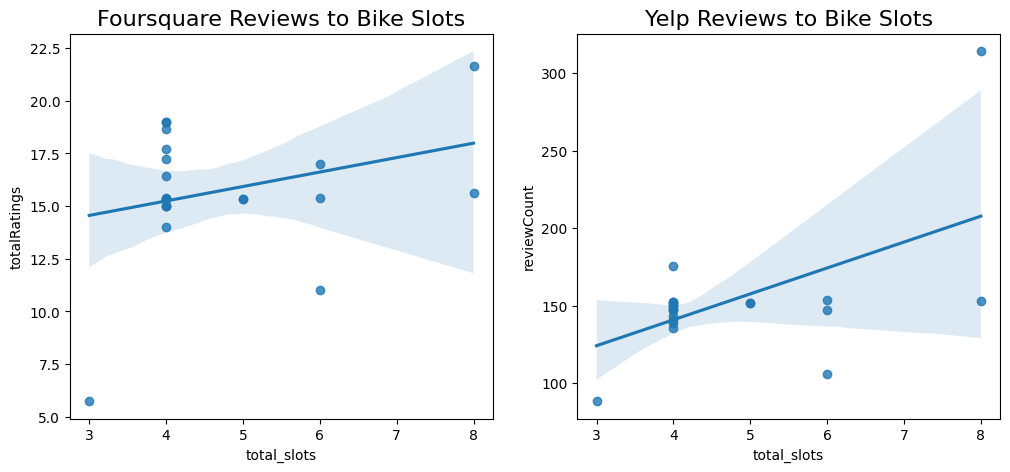

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(data=fsStationsNumDF, x='total_slots', y='totalRatings', ax=ax[0])
ax[0].set_title('Foursquare Reviews to Bike Slots', fontsize=16)

sns.regplot(data=yelpStationsNumDF, x='total_slots', y='reviewCount', ax=ax[1])
ax[1].set_title('Yelp Reviews to Bike Slots', fontsize=16)

plt.show()

* Looking at the linear regression fit plots for the most correlated items to the total slots, we can conclude similar information to the correlation matrixes. 
* There is little correlation for the foursqaure data to locations nearby, and even a negative one for the Yelp data. 
* The total ratings however show a a relationship where there are more bikes where more people give reviews and in places with better average reviews. 

# Database

In [40]:
import sqlite3
from sqlite3 import Error


Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [41]:
# Defining functions for sqlite connection, executing SQL code, and SQL queries. Functions adapted from LHL course materials
def create_connection(path):
    """
    Creates connection to database in folder path
    Args: 
        path (str) : directory of database.
    Returns:
        sqlite3 connection
    """
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def execute_query(connection, query):
    """ 
    Runs SQL code through sqlite connection
    Args:
        connection: sqlite3 connection
        query (str): String of SQL code to be executed
    Returns: 
        None
    """
    cursor = connection.cursor()
    try:
        cursor.executescript(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")


def execute_read_query(connection, query):
    """ 
    Executes a query read to an sqlite database
    Args:
        connection: sqlite3 connection
        query (str): String of SQL query to be executed
    Returns: 
        Results of SQL Query
    """
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [42]:
# Creating connection
connection = create_connection("../data/ReddingBikes.db")

Connection to SQLite DB successful


In [43]:
# Setting up tables 
createBikeStationsTable = """
CREATE TABLE IF NOT EXISTS BikeStations (
  'stationID' INTEGER PRIMARY KEY AUTOINCREMENT,
  'id' TEXT NOT NULL,
  'uid' TEXT NOT NULL, 
  'empty_slots' INTEGER NOT NULL, 
  'free_bikes' INTEGER NOT NULL,
  'total_slots' INTEGER NOT NULL,
  'latitude' FLOAT NOT NULL,
  'longitude' FLOAT NOT NULL,
  'name' TEXT NOT NULL,
  'address' TEXT NOT NULL,
  'free_ebikes' INTEGER NOT NULL,
  'has_ebikes' BOOLEAN NOT NULL,
  'free_normal_bikes' INTEGER NOT NULL,
  'timestamp' TIMESTAMP NOT NULL,
  'last_updated' TIMESTAMP NOT NULL,
  'renting' BOOLEAN NOT NULL,
  'returning' BOOLEAN NOT NULL
);
"""

createFoursquareVenuesTable = """
CREATE TABLE IF NOT EXISTS FoursquareVenues (
  'fsIndex' INTEGER PRIMARY KEY AUTOINCREMENT,
  'fsqID' TEXT NOT NULL,
  'venueName' TEXT NOT NULL,
  'formattedAddress' TEXT NOT NULL, 
  'catID' INTEGER NOT NULL, 
  'catName' TEXT NOT NULL,
  'catIDGroup' TEXT NOT NULL,
  'distance' INTEGER NOT NULL,
  'rating' FLOAT,
  'totalRatings' INTEGER,
  'totalPhotos' INTEGER,
  'totalTips' INTEGER,
  'popularity' FLOAT,
  'price' INTEGER,
  'storeVerified' BOOLEAN NOT NULL,
  'stationIndex' INTEGER NOT NULL,
  FOREIGN KEY (stationIndex) REFERENCES BikeStations ('stationID')
);
"""

createYelpVenuesTable = """
CREATE TABLE IF NOT EXISTS YelpVenues (
  'yelpIndex' INTEGER PRIMARY KEY AUTOINCREMENT,
  'YelpID' TEXT NOT NULL,
  'venueName' TEXT NOT NULL,
  'displayAddress' TEXT NOT NULL, 
  'distance' FLOAT NOT NULL,
  'rating' FLOAT,
  'reviewCount' INTEGER,
  'price' INTEGER,
  'stationIndex' INTEGER NOT NULL,
  'category' TEXT NOT NULL,
  'totalVenues' INTEGER NOT NULL,
  FOREIGN KEY (stationIndex) REFERENCES BikeStations ('stationID')
);
"""


execute_query(connection, createBikeStationsTable)
execute_query(connection, createFoursquareVenuesTable)
execute_query(connection, createYelpVenuesTable)


In [258]:
ReddingBikesDF.to_sql('BikeStations', connection, index_label='stationID', if_exists='append')
fsVenuesDF.to_sql('FoursquareVenues', connection, index_label='fsIndex', if_exists='append')
yelpVenuesDF.to_sql('YelpVenues', connection, index_label='yelpIndex', if_exists='append')

1160


#### Look at the data before and after the join to validate your data.

In [44]:
# Testing Query
selectStation = """
SELECT 
    stationID, 
    category,
    avg(totalVenues) as totalVenues, 
    count(yelpIndex) as totalVenuesReturned,
    avg(totalVenues) - count(yelpIndex) as notReturned
FROM Bikestations 
JOIN YelpVenues ON stationIndex = StationID
GROUP BY stationID, category
"""
yelpVenueCount = pd.DataFrame(execute_read_query(connection, selectStation), columns=['stationId','category','totalVenues','totalVenuesRecieved','notReturned'])


In [45]:
# Validating that joining tables from database works and also shows number of venues that yelp api did not return due to the limit.
yelpVenueCount


,stationId,category,totalVenues,totalVenuesRecieved,notReturned
0,0,bars,14.0,13,1.0
1,0,restaurants,58.0,50,8.0
2,1,bars,13.0,13,0.0
3,1,restaurants,59.0,50,9.0
4,2,bars,13.0,13,0.0
5,2,restaurants,59.0,50,9.0
6,3,bars,3.0,1,2.0
7,3,restaurants,23.0,9,14.0
8,4,bars,10.0,4,6.0
9,4,restaurants,36.0,18,18.0


Creating another combined table of all unique venues and appropriate aggregatation using SQLite database and pandas dataframe methods from both foursquare and Yelp APis

In [46]:
stationVenues = """ 
WITH allVenues AS (
    SELECT bs.stationID, fs.venueName, fs.distance, fs.rating, fs.totalRatings, fs.price
    FROM BikeStations bs 
    JOIN FoursquareVenues fs ON bs.stationID = fs.stationIndex

    UNION

    SELECT bs.stationID, yelp.venueName, yelp.distance, yelp.rating, yelp.reviewCount,  yelp.price
    FROM BikeStations bs 
    JOIN YelpVenues yelp ON bs.stationID = yelp.stationIndex
)
SELECT 
    *
FROM allVenues
"""

allVenuesDF = pd.DataFrame(execute_read_query(connection, stationVenues), columns = ['station','name','distance','rating','totalRatings','price'])

In [62]:
agg_dict = {'distance':'mean', 'rating':'mean','totalRatings':'mean', 'price':'mean'}
combinedDF = allVenuesDF.dropna().groupby(['station','name']).agg(agg_dict)

In [63]:
combinedDF

distance  rating  totalRatings  price
station name                                                             
0       Cafe Paradisio            437.633248    4.10         255.0    2.0
        Caffé Pagato              633.978380    4.60          94.0    1.0
        Carnegie's                515.485935    3.80          82.0    2.0
        Chu's Too                 991.398316    3.90         133.0    2.0
        Cinders Wood Fired Pizza  578.252539    4.30         598.0    2.0
...                                      ...     ...           ...    ...
21      Theory Collaborative      647.000000    8.90          35.0    1.0
        Trendy's                  977.906623    4.60         829.0    2.0
        Vintage Public House      615.328251    4.10         232.0    2.0
        Wienerschnitzel           648.706656    5.35          28.0    1.0
        Woody's Brewing           808.741098    4.20         748.0    2.0

[809 rows x 4 columns]

In [43]:
# combinedDF.to_csv('../data/combinedDF.csv', sep=',')

In [52]:
combinedDF.reset_index(inplace=True)

In [54]:
agg_dict = {'name':'count','distance':'mean', 'rating':'mean','totalRatings':'mean', 'price':'mean'}
combinedSummaryDF = combinedDF.groupby(['station']).agg(agg_dict)

In [59]:
combinedSummaryDF.rename(columns={'name':'venueCount'}, inplace=True)

In [64]:
combinedSummaryDF

,venueCount,distance,rating,totalRatings,price
station,,,,,
0,43,523.970492,4.618605,177.918605,1.802326
1,46,354.960819,4.741304,166.489130,1.771739
2,46,348.262772,4.741304,166.489130,1.771739
3,4,960.983837,4.712500,112.875000,1.000000
4,13,630.752696,4.569231,116.576923,1.615385
5,43,595.510781,4.698837,161.186047,1.779070
6,20,743.783756,4.890000,145.650000,1.925000
7,44,395.918259,4.640909,173.647727,1.784091
8,44,566.634077,4.696591,176.363636,1.784091


In [60]:
# combinedSummaryDF.to_csv('../data/combinedSummaryDF.csv', sep=',')

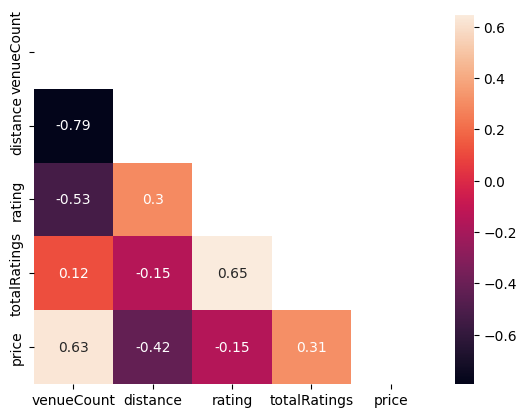

In [65]:
corrHeatmap(combinedSummaryDF)